# Sampling - Accept-Reject

Author: Arun Manohar

Email: arunmano121@outlook.com

License: BSD-3-Clause

A program to study Accept-Reject sampling technique. This is also called Rejection sampling. The program shows two cases of using different wrapping function and their importance to sampling efficiency.

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def gaussian(x, mu, sig):
    '''
    returns the gaussian function given the x, mu and sig values.
    '''
    return 1./(np.sqrt(2*np.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2)/2)

In [3]:
# setting percentage to sample
while True:
    try:
        # get input
        pct = float(input('Enter percentage to sample: '))
        break
    except Exception as e:
        print(e)
        print('Enter positive percentage!')

Enter percentage to sample:  33


In [4]:
# x values between -6 and 6 broken into 10000 points
x_values = np.linspace(-6, 6, 10000)
# mixture of Gaussian function
y_values = gaussian(x_values, 0, 2) + \
    gaussian(x_values, 1, 1) + \
    gaussian(x_values, -2, 0.5) + \
    gaussian(x_values, 0.5, 0.5)

# number of points to sample
n_pts = 10000 * pct/100

In [5]:
# setting the wrapping function - this function should fully encompase
# the underlying function over the same range
y_val_wrap1 = 8 * gaussian(x_values, 0, 2)
# alternative wrapping function to demonstrate the importance of
# wrapping function for sampling efficiency
y_val_wrap2 = np.max(y_values) * np.ones(x_values.shape)

ov_cnt1 = 0  # initialize overall counter to track samples - wrap1
ac_cnt1 = 0  # initalize counter to track accepted samples - wrap1
ov_cnt2 = 0  # initialize overall counter to track samples - wrap2
ac_cnt2 = 0  # initalize counter to track accepted samples - wrap2

# sampled points placeholder
x_sampled1 = np.empty([0], dtype=float)  # wrap1
x_sampled2 = np.empty([0], dtype=float)  # wrap2

# wrap1
# continue sampling until the desired cnt value is reached
while ac_cnt1 < n_pts:
    # sample a number using the wrapping function
    j_samp1 = np.random.normal(0.0, 2.0)

    num1 = gaussian(j_samp1, 0, 2) + \
        gaussian(j_samp1, 1, 1) + \
        gaussian(j_samp1, -2, 0.5) + \
        gaussian(j_samp1, 0.5, 0.5)

    den1 = 8 * gaussian(j_samp1, 0, 2)

    ratio1 = num1/den1

    j_acc_prob1 = np.random.rand()

    ov_cnt1 += 1

    if ratio1 >= j_acc_prob1:  # accept the sample
        ac_cnt1 += 1  # update counter of sampled points
        x_sampled1 = np.append(x_sampled1, j_samp1)

# wrap2
# continue sampling until the desired cnt value is reached
while ac_cnt2 < n_pts:
    # sample a number using the wrapping function
    j_samp2 = np.random.uniform(-6, 6)

    num2 = gaussian(j_samp2, 0, 2) + \
        gaussian(j_samp2, 1, 1) + \
        gaussian(j_samp2, -2, 0.5) + \
        gaussian(j_samp2, 0.5, 0.5)

    den2 = np.max(y_values)

    ratio2 = num2/den2

    j_acc_prob2 = np.random.rand()

    ov_cnt2 += 1

    if ratio2 >= j_acc_prob2:  # accept the sample
        ac_cnt2 += 1  # update counter of sampled points
        x_sampled2 = np.append(x_sampled2, j_samp2)


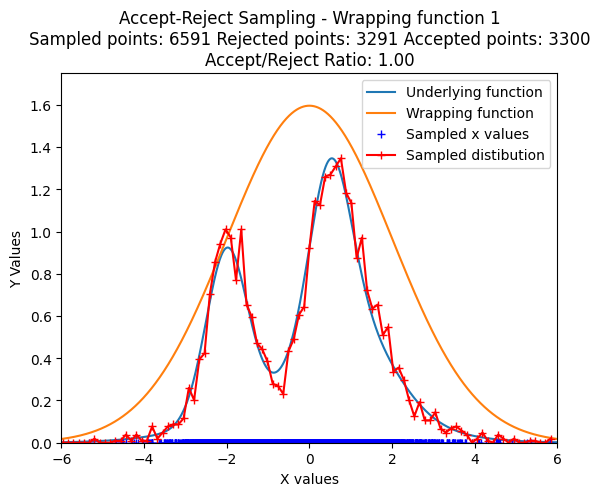

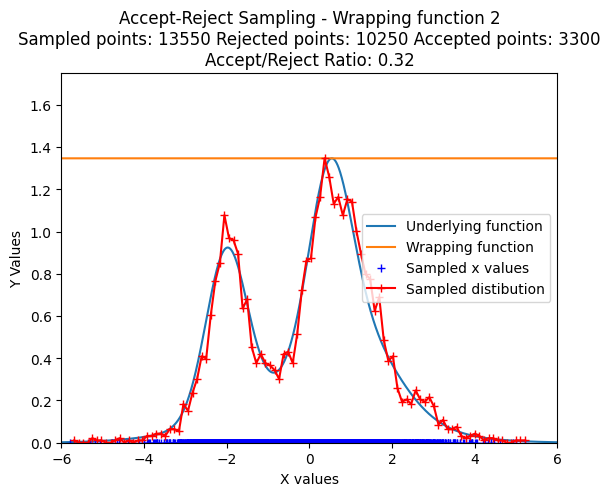

In [7]:
# plotting the graph to show the effect of two
# wrapping functions.
fig, ax = plt.subplots(1, 1)

ax.plot(x_values, y_values, label='Underlying function')
ax.plot(x_values, y_val_wrap1, label='Wrapping function')
ax.plot(x_sampled1, np.zeros(x_sampled1.shape), 'b+',
         label='Sampled x values')

counts, bins = np.histogram(x_sampled1, bins=100)
rat = np.max(counts)/np.max(y_values)
ax.plot(bins[1:], counts/rat, 'r+-', label='Sampled distibution')
ax.set_ylabel('Y Values')
ax.set_xlabel('X values')
ax.set_xlim([-6, 6])
ax.set_ylim([0, 1.75])
title = 'Accept-Reject Sampling - Wrapping function 1' + \
    ('\nSampled points: %d Rejected points: %d Accepted points: %d' %
     (ov_cnt1, ov_cnt1 - ac_cnt1, ac_cnt1)) + \
    ('\nAccept/Reject Ratio: %0.2f' % (ac_cnt1/(ov_cnt1 - ac_cnt1)))
ax.set_title(title)
ax.legend()

fig, ax = plt.subplots(1, 1)

ax.plot(x_values, y_values, label='Underlying function')
ax.plot(x_values, y_val_wrap2, label='Wrapping function')
ax.plot(x_sampled2, np.zeros(x_sampled2.shape), 'b+',
         label='Sampled x values')

counts, bins = np.histogram(x_sampled2, bins=100)
rat = np.max(counts)/np.max(y_values)
ax.plot(bins[1:], counts/rat, 'r+-', label='Sampled distibution')
ax.set_ylabel('Y Values')
ax.set_xlabel('X values')
ax.set_xlim([-6, 6])
ax.set_ylim([0, 1.75])
title = 'Accept-Reject Sampling - Wrapping function 2' + \
    ('\nSampled points: %d Rejected points: %d Accepted points: %d' %
     (ov_cnt2, ov_cnt2 - ac_cnt2, ac_cnt2)) + \
    ('\nAccept/Reject Ratio: %0.2f' % (ac_cnt2/(ov_cnt2 - ac_cnt2)))
ax.set_title(title)
ax.legend()

#plt.tight_layout()
plt.show()
